In [24]:
! git clone https://github.com/jennyschilling/project_gss_group11/

fatal: destination path 'project_gss_group11' already exists and is not an empty directory.


      adoptus          immfate                   letin1a      letinhsp1  \
71012     3.0  become citizens          reduced a little      decreased   
71030     3.0  become citizens          reduced a little  left the same   
71028     3.0  become citizens          reduced a little  left the same   
71025     3.0  become citizens  remain the same as it is  left the same   
71022     3.0  become citizens        increased a little      increased   

           letinasn1   age     sex   race born  
71012  left the same  83.0    male  white  yes  
71030  left the same  33.0  female  white  yes  
71028  left the same  30.0    male  white  yes  
71025  left the same  20.0  female  white  yes  
71022      increased  21.0  female  white  yes  


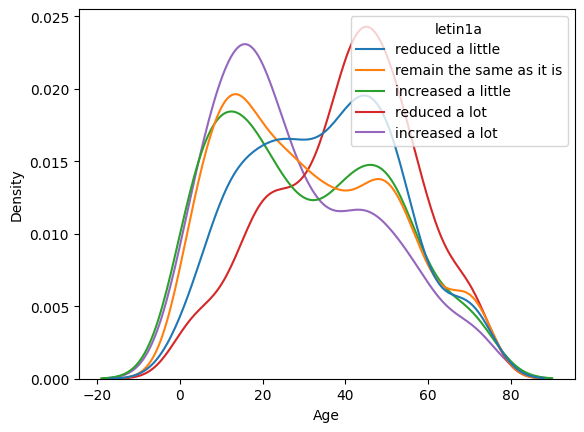

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./project_gss_group11/selected_gss_data.csv', low_memory=False)

# sort the data by adoptus, non-numerical values will go to top which we will remove
df = df.sort_values(by=['adoptus'], ascending=False)

# remove the extra two header rows created from our loop in get_gss.ipynb
df = df.iloc[2:]

# doesn't impact results at all
df = df.drop('parborn', axis = 1)

# drop rows w missing values in crucial columns
df = df.dropna(subset=['adoptus', 'immfate', 'letin1a', 'letinhsp1', 'letinasn1'])
print(df.head())

# convert age column to numerical data type
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])

# remove "don't know" categories from adoptus
df = df[~df['adoptus'].isin(['D', 'N', 'I', 'S'])]

# grouped kernel density plot,
#   common_norm allows us to normalize independently for each group
sns.kdeplot(data=df,x='age',hue='letin1a',common_norm=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


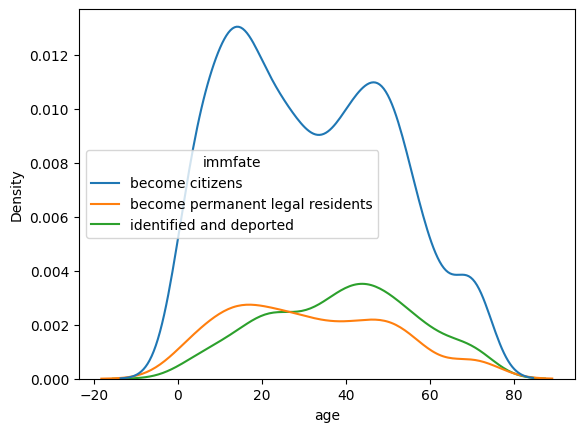

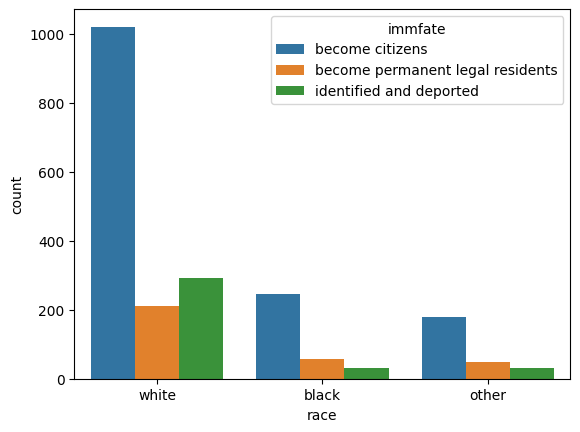

race                              black  other  white
immfate                                              
become citizens                     245    178   1020
become permanent legal residents     56     48    211
identified and deported              32     30    292 



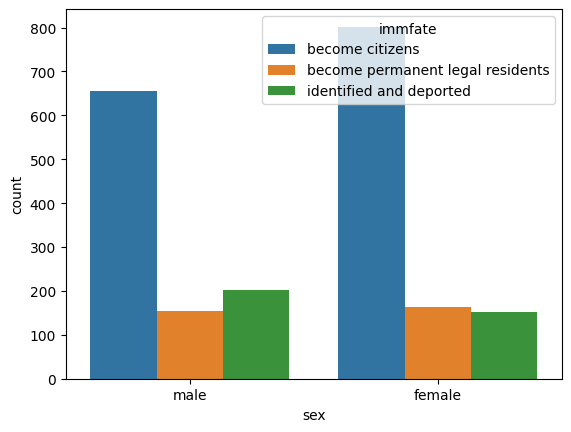

sex                               female  male
immfate                                       
become citizens                      802   656
become permanent legal residents     163   154
identified and deported              152   203 



In [26]:
### immfate

# vars already cleaned
# immfate by age
sns.kdeplot(data=df, x='age', hue='immfate')
plt.show()

# immfate by race
sns.countplot(data=df, x='race', hue='immfate')
plt.show()
# output may be influenced by amount of each race in each sample
print(pd.crosstab(df['immfate'],df['race']),'\n')
## white
# 67.0% said become citizens
# 13.9% said become permanent legal residents
# 19.2% said identified and deported
## black
# 73.6% said become citizens
# 16.8% said become permanent legal residents
# 9.6% said identified and deported
## other
# 69.5% said become citizens
# 18.8% said become permanent legal residents
# 11.7% said identified and deported
## ^^ could maybe do a plot with this info

# immfate by sex
sns.countplot(data=df, x='sex', hue='immfate')
plt.show()
print(pd.crosstab(df['immfate'],df['sex']),'\n')
## male
# 64.8% said become citizens
# 15.2% said become permanent legal residents
# 20.0% said identified and deported
## female
# 71.8% said become citizens
# 14.6% said become permanent legal residents
# 13.6% said identified and deported
## ^^ could maybe do a plot with this info

      adoptus          immfate                   letin1a      letinhsp1  \
71012     3.0  become citizens          reduced a little      decreased   
71030     3.0  become citizens          reduced a little  left the same   
71028     3.0  become citizens          reduced a little  left the same   
71025     3.0  become citizens  remain the same as it is  left the same   
71022     3.0  become citizens        increased a little      increased   

           letinasn1  age     sex   race born  
71012  left the same   65    male  white  yes  
71030  left the same   15  female  white  yes  
71028  left the same   12    male  white  yes  
71025  left the same    2  female  white  yes  
71022      increased    3  female  white  yes  
      adoptus          immfate                   letin1a      letinhsp1  \
71012    both  become citizens          reduced a little      decreased   
71030    both  become citizens          reduced a little  left the same   
71028    both  become citizens      

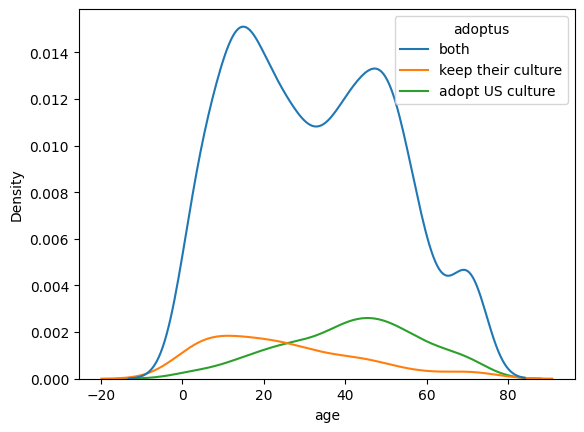

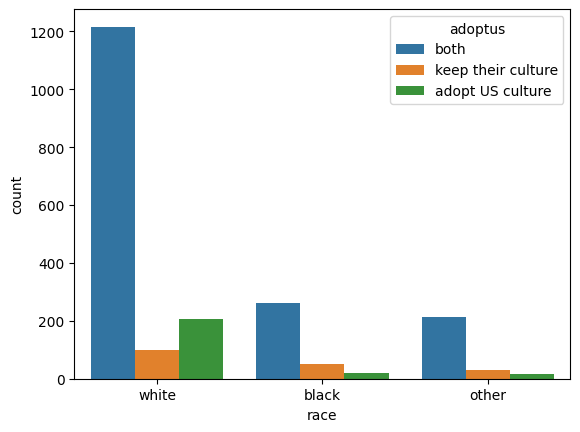

race                black  other  white
adoptus                                
adopt US culture       19     15    208
both                  263    212   1216
keep their culture     51     29     99 



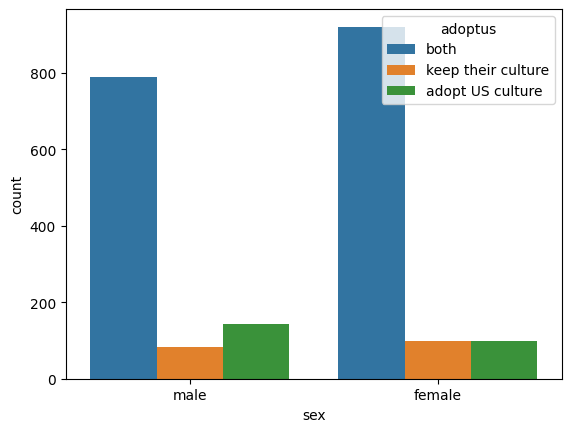

sex                 female  male
adoptus                         
adopt US culture        99   143
both                   920   788
keep their culture      98    82 



In [27]:
### adoptus
# similar to immfate

# replacing varibales because the numeric version doesn't mean much and visually looks bad
df['adoptus'] = df['adoptus'].replace("1.0", "adopt US culture").replace("2.0", "keep their culture").replace("3.0", "both")
print(df.head())

sns.kdeplot(data=df, x='age', hue='adoptus')
plt.show()
# very very similar pattern to immfate

# by race
# replacing varibales
sns.countplot(data=df, x='race', hue='adoptus')
plt.show()
# need proportions
print(pd.crosstab(df['adoptus'],df['race']),'\n')
## white
# 13.7% responded with adopt US culture
# 6.5% responded with keep their culture
# 79.8% responded with both
## black
# 5.7% responded with adopt US culture
# 15.3% responded with keep their culture
# 79.0% responded with both
## other
# 5.9% responded with adopt US culture
# 11.3% responded with keep their culture
# 82.8% responded with both
## ^^ could maybe do a plot with this info

# by sex
sns.countplot(data=df, x='sex', hue='adoptus')
plt.show()
# need proportions
print(pd.crosstab(df['adoptus'],df['sex']),'\n')
## male
# 14.1% responded with adopt US culture
# 8.1% responded with keep their culture
# 77.8% responded with both
## female
# 8.9% responded with adopt US culture
# 8.8% responded with keep their culture
# 82.4% responded with both
## ^^ could maybe do a plot with this info
